Import Libraries

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import LabelEncoder
from random import shuffle
from sklearn.model_selection import RandomizedSearchCV as RSCV
import matplotlib.pyplot as plt
import seaborn as sns
import time


Reading in Data

In [11]:
file_path = "data.csv"
df = pd.read_csv(file_path, index_col='year')

file_path = "tracks_features.csv"
df2 = pd.read_csv(file_path, index_col='year')

In [12]:
song_db=df.copy()
song_larger_db=df2.copy()

In [13]:
song_db.head(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence
year,,,,,,,,,,,,,,,,,,
1928,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790
1928,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767
1928,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800


In [14]:
song_larger_db.head(3)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date
year,,,,,,,,,,,,,,,,,,,,,
1999,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,1,0.0727,0.0261,0.000011,0.356,0.503,117.906,210133,4.0,1999-11-02
1999,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,1,0.1880,0.0129,0.000071,0.155,0.489,103.680,206200,4.0,1999-11-02
1999,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,1,0.4830,0.0234,0.000002,0.122,0.370,149.749,298893,4.0,1999-11-02


In [15]:
song_db.shape


(169909, 18)

In [16]:
song_larger_db.shape

(1204025, 23)

Combining Databases

In [17]:
song_db.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence'],
      dtype='object')

In [18]:
song_larger_db.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'release_date'],
      dtype='object')

In [19]:
song_db.drop(['artists','id', 'name', 'release_date', 'popularity' ], axis = 1, inplace = True)


In [20]:
song_larger_db.drop(['artists','id', 'name', 'release_date', 'album_id','artist_ids', 'time_signature', 'track_number', 'disc_number', 'album' ], axis = 1, inplace = True)


In [21]:
np.sort(song_db.columns)
np.sort(song_larger_db.columns)


array(['acousticness', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'speechiness', 'tempo', 'valence'], dtype=object)

In [22]:
np.sort(song_larger_db.columns) == np.sort(song_db.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [23]:
song_db = pd.concat([song_db,song_larger_db])
song_db.shape

(1373934, 13)

In [24]:
song_db.columns[song_db.isnull().any()]

Index([], dtype='object')

In [25]:
song_db.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
dtype: int64

Analysis

In [26]:
song_db.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,1.373934e+06,1.373934e+06,1.373934e+06,1.373934e+06,1.373934e+06,1.373934e+06,1.373934e+06,1.373934e+06,1.373934e+06,1.373934e+06,1.373934e+06,1.373934e+06,1.373934e+06
mean,4.524970e-01,4.986330e-01,2.466839e+05,5.069463e-01,7.064895e-02,2.679064e-01,5.194939e+00,2.022290e-01,-1.175449e+01,6.760470e-01,8.557872e-02,1.175495e+02,4.408613e-01
std,3.844557e-01,1.885425e-01,1.578336e+05,2.915286e-01,2.562376e-01,3.708067e-01,3.534082e+00,1.800179e-01,6.834722e+00,4.679825e-01,1.207497e-01,3.091196e+01,2.716692e-01
min,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.300000e-02,3.640000e-01,1.735870e+05,2.540000e-01,0.000000e+00,5.100000e-06,2.000000e+00,9.700000e-02,-1.511300e+01,0.000000e+00,3.510000e-02,9.401700e+01,2.040000e-01
50%,4.030000e-01,5.070000e-01,2.223200e+05,5.180000e-01,0.000000e+00,4.830000e-03,5.000000e+00,1.260000e-01,-9.880000e+00,1.000000e+00,4.460000e-02,1.163490e+02,4.220000e-01
75%,8.640000e-01,6.380000e-01,2.830000e+05,7.590000e-01,0.000000e+00,6.720000e-01,8.000000e+00,2.480000e-01,-6.760000e+00,1.000000e+00,7.260000e-02,1.369300e+02,6.600000e-01
max,9.960000e-01,1.000000e+00,6.061090e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00,7.234000e+00,1.000000e+00,9.690000e-01,2.489340e+02,1.000000e+00


Cleaning up Indexes - Only read from 1950 to 2019

In [27]:
np.sort(song_db.index.unique())

array([   0, 1900, 1908, 1909, 1917, 1920, 1921, 1922, 1923, 1924, 1925,
       1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936,
       1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
       1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [28]:
l_drop = np.arange(1920,1950)
l_drop = np.concatenate((l_drop,[0,1900, 1908, 1909, 1917, 2020]))
song_db.drop(labels=l_drop, axis=0, inplace = True)

np.sort(song_db.index.unique())

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019], dtype=int64)

Quantify Indices

In [29]:
enc = LabelEncoder()

In [30]:
labels = song_db.index
enc.fit(song_db.index.unique())

y = enc.transform(np.array(labels))
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]


In [31]:
y_decade = y//10
Y_decade = np.unique(y_decade)
print(np.unique(Y_decade))

[0 1 2 3 4 5 6]


In [32]:
enc.fit(song_db['explicit'].unique())
song_db['explicit'] = enc.transform(song_db['explicit'])

In [33]:
song_db.set_index(y_decade, inplace=True)

In [34]:
song_db.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.782,0.633,106471,0.2610,1,0.0000,1,0.235,-16.389,1,0.7970,167.679,0.655
0,0.988,0.420,232933,0.0909,0,0.7860,10,0.104,-19.388,1,0.0409,123.089,0.227
0,0.993,0.394,177981,0.2580,0,0.0770,5,0.153,-9.779,0,0.1100,74.761,0.340
0,0.730,0.618,125300,0.2720,1,0.0000,6,0.146,-18.515,1,0.7310,67.141,0.449
0,0.993,0.475,188600,0.4070,0,0.0134,9,0.116,-13.011,1,0.0492,74.130,0.594


In [35]:
priors = song_db.index.value_counts().sort_index().to_numpy() /len(song_db.index)
print(priors)

[0.01816086 0.02262071 0.0292213  0.03818975 0.13599542 0.34873576
 0.4070762 ]


In [36]:
class_priors = np.diag(priors)
print(class_priors)

[[0.01816086 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.02262071 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.0292213  0.         0.         0.
  0.        ]
 [0.         0.         0.         0.03818975 0.         0.
  0.        ]
 [0.         0.         0.         0.         0.13599542 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.34873576
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.4070762 ]]


In [37]:
num_classes = len(Y_decade)

print(Y_decade)
print(num_classes)

[0 1 2 3 4 5 6]
7


In [38]:
N = len(df)
print('Labels:',Y_decade)
print('Total Datapoints:',N)
print("Counts Per Class:")
print(song_db.index.value_counts().sort_index())

Labels: [0 1 2 3 4 5 6]
Total Datapoints: 169909
Counts Per Class:
0     23109
1     28784
2     37183
3     48595
4    173049
5    443753
6    517989
dtype: int64


In [39]:
a=song_db[song_db.index==1]
a.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,28784.000000,28784.000000,2.878400e+04,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000,28784.000000
mean,0.645636,0.477305,2.170223e+05,0.395853,0.000903,0.185949,5.082407,0.216513,-13.376286,0.754760,0.061205,114.398324,0.526187
std,0.293182,0.162811,1.409495e+05,0.228457,0.030042,0.329124,3.467462,0.187622,5.391233,0.430237,0.091449,30.319280,0.271199
min,0.000000,0.000000,3.808000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.445000,0.367000,1.472800e+05,0.212000,0.000000,0.000000,2.000000,0.101000,-16.155000,1.000000,0.032975,92.050500,0.304000
50%,0.733000,0.490000,1.762600e+05,0.375000,0.000000,0.000231,5.000000,0.140000,-12.420000,1.000000,0.039200,111.921500,0.540000
75%,0.892000,0.594000,2.348935e+05,0.557000,0.000000,0.177000,8.000000,0.268000,-9.599750,1.000000,0.052200,131.998000,0.753000
max,0.996000,0.944000,3.557955e+06,1.000000,1.000000,1.000000,11.000000,0.995000,1.812000,1.000000,0.966000,238.895000,0.991000


In [40]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(song_db.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(song_db.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

Variable Analysis

In [ ]:
# https://www.kaggle.com/code/pelinsoylu/spotify-popularity-prediction-ml-practice/notebook
def bar_plot(variable):
    
    var=song_db[variable]
    var_value= var.value_counts()
    print(var_value)
    print(var_value.shape)
    print(var_value.index.shape)
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_value.index,var_value,color="orange")
    plt.xticks(var_value.index,var_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,var_value))

7     165277
0     159704
2     153340
9     141859
5     107454
4     103460
1      97900
11     84684
10     81526
8      68825
6      65707
3      42726
Name: key, dtype: int64
(12,)
(12,)


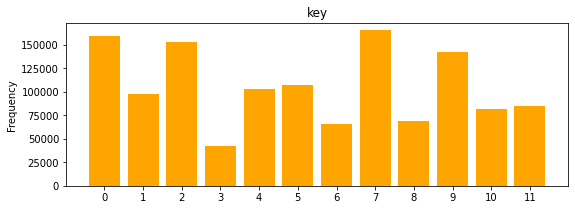

key:
7     165277
0     159704
2     153340
9     141859
5     107454
4     103460
1      97900
11     84684
10     81526
8      68825
6      65707
3      42726
Name: key, dtype: int64
1    865129
0    407333
Name: mode, dtype: int64
(2,)
(2,)


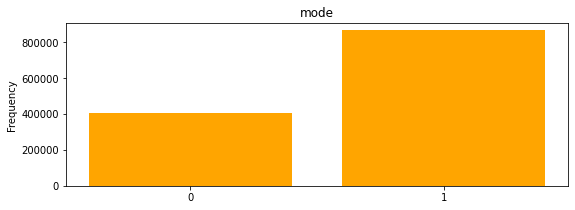

mode:
1    865129
0    407333
Name: mode, dtype: int64
0    1199652
1      72810
Name: explicit, dtype: int64
(2,)
(2,)


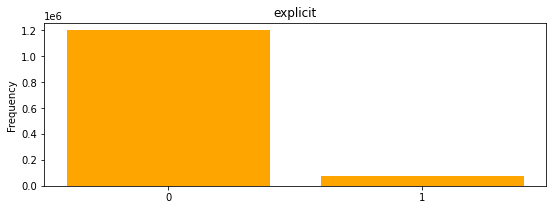

explicit:
0    1199652
1      72810
Name: explicit, dtype: int64


In [ ]:
category1 = ["key","mode","explicit"]
for c in category1:
    bar_plot(c)

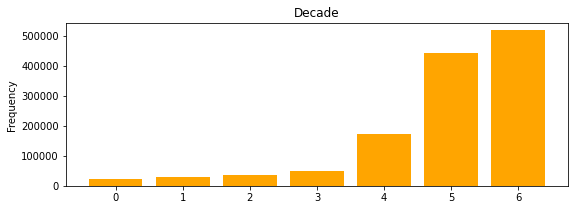

Decade:
6    517989
5    443753
4    173049
3     48595
2     37183
1     28784
0     23109
dtype: int64


In [ ]:
var_value= song_db.index.value_counts()
var_labels= song_db.index.unique()

#visualize
plt.figure(figsize=(9,3))
plt.bar(var_value.index,var_value,color="orange")
plt.xticks(var_value.index,var_value.index.values)
plt.ylabel("Frequency")
plt.title("Decade")
plt.show()
print("{}:\n{}".format("Decade",var_value))

Basic Data Analysis

Models

In [ ]:
covariance = song_db.std()
mean = song_db.mean()
X = (song_db-song_db.mean())/song_db.std()

Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y_decade, test_size = 0.30)


start = time.time()


clf = RandomForestClassifier(n_estimators = 100)
print('done')

clf.fit(X_train, y_train)

feature_imp = pd.Series(clf.feature_importances_, index = song_db.columns).sort_values(ascending = False)

print(feature_imp)


y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))



stop = time.time()
print()
print('Time to run (sec): ', stop - start) 
print('Time to run (min): ', (stop - start)/60) 

done
loudness            0.106194
duration_ms         0.096827
valence             0.095895
energy              0.093181
acousticness        0.092609
tempo               0.092401
danceability        0.091940
speechiness         0.090452
liveness            0.089789
instrumentalness    0.080975
key                 0.054286
mode                0.010056
explicit            0.005394
dtype: float64

ACCURACY OF THE MODEL:  0.47414070870411457

Time to run (sec):  1441.4601874351501
Time to run (min):  24.024336457252502


In [ ]:
from sklearn.feature_selection import RFE
prunded = RFE(clf)


NameError: name 'clf' is not defined

In [ ]:
estimator = clf.estimators_[3]

NameError: name 'clf' is not defined

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
# export_graphviz(estimator, out_file='tree.dot', 
#                feature_names = song_db.columns,
#                class_names = ['1950', '1960', '1970', '1980', '1990', '2000', '2010'],
#                rounded = True, proportion = False, 
#                precision = 2, filled = True)

In [ ]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])



3221225725

In [ ]:
#import pydot

#(graph,) = pydot.graph_from_dot_file('tree.dot')
#graph.write_png('tree.png')

"dot" with args ['-Tpng', 'C:\\Users\\ALMEN~1.DES\\AppData\\Local\\Temp\\tmpoxoyb2ir'] returned code: 3221226505

stdout, stderr:
 b''
b'\r\n***MEMORY-ERROR***: dot.exe[31172]: GSlice: failed to allocate 4080 bytes (alignment: 4096): Not enough space\r\n\r\n'



AssertionError: "dot" with args ['-Tpng', 'C:\\Users\\ALMEN~1.DES\\AppData\\Local\\Temp\\tmpoxoyb2ir'] returned code: 3221226505